# Eying the Iris Dataset

The Iris flower data set (aka Fisher's Iris data set aka Anderson's Iris data set aka the 'Hello World' of machine learning) is a multivariate data set introduced by the British statistician, eugenicist (more on this later), and biologist Ronald Fisher in his 1936 paper, 'The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis'.

The data was collected by Edgar Anderson to quantify the morphologic variation of Iris flowers of three related species (picture below). Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

<p align="center">
  <img src = "The Three Iris.png"/>
</p>

<center><i>The Three Iris Species</center>

Using the data set, I am attempting to **predict an observation's species of Iris flower given only the lengths and widths of the flower's petals and sepals**. This is a classic classification problem and I will utilise a supervised machine learning algorithm to solve it.

Before beginning, one of my initial thoughts that I feel is worth keeping in mind is that this data set might not be entirely representative of the Iris flower. This is due to the following reasons:
- for the two species collected in the Gaspé Peninsula, the values may only be representative of the flowers at that region only.
- was the data collected on flowers of different maturity or similar maturity?
- there are more species of the Iris flower than the three recorded in the data set.


## Let's begin the exploration!

In [1]:
# Importing libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Reading in the data set
data = pd.read_csv('Iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


*Note: All four measurements are in centimetres.*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**There are no missing values in this data set.**

In [4]:
data.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

**There are equal number of observations for each species.**

## Before proceeding further, let's divide the data into a train and a test set.

It is a principle in machine learning to conduct analysis and model building only on the train set. Later, the test set will be used to see whether any relationships found within the train set remains true.

In [5]:
train, test = train_test_split(data, test_size = 0.2, stratify = data['species'], random_state = 42)

As there are only 150 observations, I feel that more observations should be allocated to the train set to develop an accurate machine learning model. Hence, I went with an 80:20 split.

## We explore again!

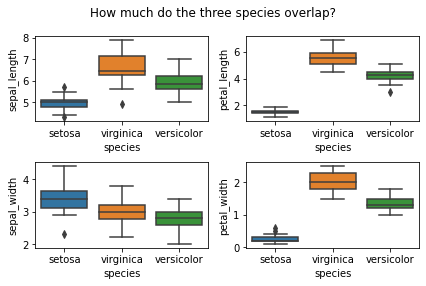

In [6]:
fig, ax = plt.subplots(2, 2)
fig.suptitle('How much do the three species overlap?')

sns.boxplot(x = 'species', y = 'sepal_length', data = train, ax = ax[0, 0])
sns.boxplot(x = 'species', y = 'petal_length', data = train, ax = ax[0, 1])
sns.boxplot(x = 'species', y = 'sepal_width', data = train, ax = ax[1, 0])
sns.boxplot(x = 'species', y = 'petal_width', data = train, ax = ax[1, 1])
fig.tight_layout(pad = 1.0); # This line is just to add some spacing between the subplots

**Observations:**
- The Setosa species has very distinct petals!
- On average, the Versicolor species has lower values as compared to the Virginica species.

Text(0.5, 0, 'Petal Length (cm)')

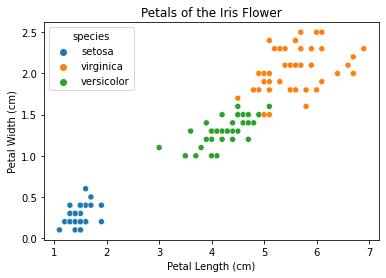

In [7]:
ax = sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'species', data = train)
ax.set_title('Petals of the Iris Flower')
ax.set_ylabel('Petal Width (cm)')
ax.set_xlabel('Petal Length (cm)')

It is very clear that relying on the petal measurements alone is sufficient to distinguish the Setosa species. More information is needed, however, to distinguish completely between the other two species.

In [8]:
# Will area or some kind of ratio separate the flowers more clearly?
train['petal_area'] = train['petal_width'] * train['petal_length']

train['petal_ratio'] = train['petal_length'] * train['petal_width']
train['sepal_ratio'] = train['sepal_length'] * train['sepal_width']
train['length_ratio'] = train['sepal_length'] * train['petal_length']
train['width_ratio'] = train['sepal_width'] * train['petal_width']

Text(0.5, 1.0, 'Petal Area of the Iris Flower')

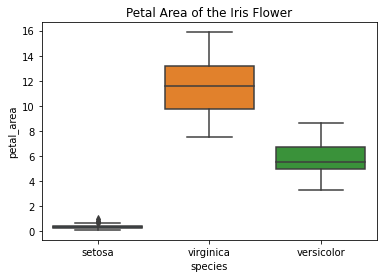

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x = 'species', y = 'petal_area', data = train).set_title('Petal Area of the Iris Flower')

Area does bring out the separation more but there is still some minor overlap between the Versicolor and Virginica species.

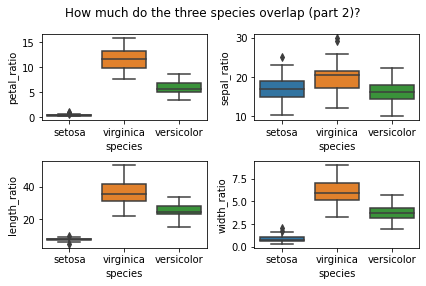

In [10]:
fig, ax = plt.subplots(2, 2)
fig.suptitle('How much do the three species overlap (part 2)?')

sns.boxplot(x = 'species', y = 'petal_ratio', data = train, ax = ax[0, 0])
sns.boxplot(x = 'species', y = 'sepal_ratio', data = train, ax = ax[0, 1])
sns.boxplot(x = 'species', y = 'length_ratio', data = train, ax = ax[1, 0])
sns.boxplot(x = 'species', y = 'width_ratio', data = train, ax = ax[1, 1])
fig.tight_layout(pad = 1.0); # This line is just to add some spacing between the subplots

No additional insights are dervied from the above plots so I will discard the newly added features.

In [11]:
train.drop(columns = ['petal_area', 'petal_ratio', 'sepal_ratio', 'length_ratio', 'width_ratio'], inplace = True)

So, **in conclusion**, the Setosa species is very distinctive and distinguishing it should be easy. However, I have not found the perfect way to distinguish between the Virginica and Versicolor species based on this data set. I'll have to live with the minor overlap and some error in the eventual predictions. Alas, machine learning is not perfect (neither am I).

## On to machine learning!

<AxesSubplot:>

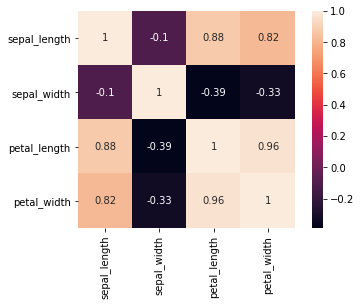

In [12]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True)

**Observations:**
- Sepal length is highly correlated to petal length and petal width
- Petal length and width are very highly correlated

A high correlation indicates that the variables contain the same information and may have an element of redundancy. Perhaps Principal Component Analysis (PCA) can be used to reduce the redundancy and the number of features.

In [13]:
# Separating the labels (target variable) from the features (independent variables)
x_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
x_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

### Decision Tree Model & Classification Results
Decision trees are my go-to model as they are easy to understand and relatable.

In [14]:
decision_tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
decision_tree.fit(x_train, y_train)
prediction = decision_tree.predict(x_test)
accuracy_score = round(metrics.accuracy_score(prediction, y_test), 2)
print(f'The accuracy of the Decision Tree is {accuracy_score}.')

The accuracy of the Decision Tree is 0.97.


**Not bad!**

Additionally, with decision trees, we can inspect the relative importance of each feature as well as the actual tree itself.

In [15]:
decision_tree.feature_importances_

array([0.        , 0.        , 0.06071875, 0.93928125])

For this model, only the petal features are of importance. Also, interestingly, the model relied almost exclusively on the petal width whereas I looked more into the petal length.

[Text(209.25, 380.52, 'petal_width <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'petal_width <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'petal_length <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'petal_length <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = virginica')]

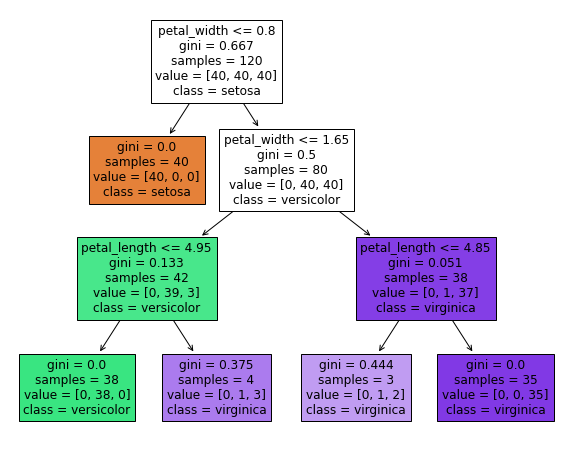

In [16]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (10,8))
plot_tree(decision_tree, feature_names = fn, class_names = cn, filled = True)

Since only two features were used by the model, we can visualise the decision boundary in a 2-D plot.

(0.0, 6.99, 0.0, 2.99)

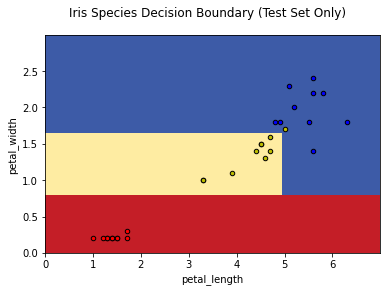

In [17]:
# Plot decision boundary for petal width vs petal length
# This code cell is entirely copied from Dehao Zhang
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(x_train[selected_predictors], y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(x_test.iloc[idx, 2], x_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Iris Species Decision Boundary (Test Set Only)")
plt.axis("tight")

Text(0.5, 1.0, "Decision Tree's Predictions")

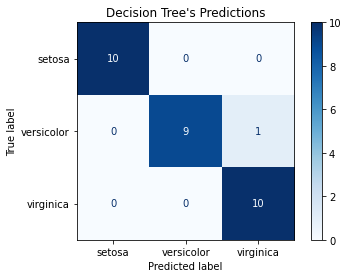

In [18]:
disp = metrics.plot_confusion_matrix(decision_tree, x_test, y_test, display_labels = cn, cmap = plt.cm.Blues)
disp.ax_.set_title("Decision Tree's Predictions")

The tree only made 1 wrong prediction (Versicolor predicted as Virginica)!

Among the reported downside of building a single decision tree are instability and overfitting. However, these effects are not seen in this exercise perhaps due to the small number of observations in this data set.

## Conclusion & Final Remarks

*On machine learning*

This was a good first attempt at machine learning using a small and simple data set. In order to develop my knowledge further, I want to dive into how the decision tree algorithm works i.e. how does it determine the conditions to split the data.

One can also play around with the train-test split and see how it affects the model accuracy.

*On distinguishing Iris species*

Based on one of the articles that I read, apparently "botanists have a better way to tell the difference between these species". In fact, Dr. Anderson himself published a manuscript titled 'The Species Problems in Iris' and noted that the morphology of the seeds of these flowers was more informative i.e. there is a noticeable difference in the seed size between these three species. 

So, even though a lot of work has been poured into this data set (by myself and others), it is important to realise that it may not be the most useful for the purpose it was collected for. The same applies to other data sets. This realisation reminds me of the saying 'all models are inaccurate' and that we have to be cognisant of our limitations.

*On Ronald Fisher*

Despite being a brilliant statistician, unfortunately Ronald Fisher was also a racist. He believed that human groups differ profoundly "in their innate capacity for intellectual and emotional development" and concludes from this that the "practical international problem is that of learning to share the resources of this planet amicably with persons of materially different nature, and that this problem is being obscured by entirely well-intentioned efforts to minimize the real differences that exist."

As such, some data scientists such as Megan Stodel are now advocating for the Iris data set to be shunned and replaced with other data sets such as the penguins, hawks, mushrooms and cars data sets. Personally, I support this call and am curious to explore them. I also want to see how effective the methods applied here will be on them.

To future notebooks then, bye!

## References
- https://en.wikipedia.org/wiki/Iris_flower_data_set
- https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5
- https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b
- https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8
- https://www.meganstodel.com/posts/no-to-iris/
- https://en.wikipedia.org/wiki/Ronald_Fisher
- https://www.theguardian.com/science/the-lay-scientist/2011/feb/23/2
